# Project: Soccer Data Analysis using SQL

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This soccer database comes from Kaggle. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive, it contains **25,000 plus matches of 10,000 players in 11 European Countries with their lead championship for Seasons 2008 to 2016**. Players and Teams' attributes* are sourced from EA Sports' FIFA video game series, including the weekly updates. Team line up with squad formation (X, Y coordinates) .Betting odds from up to 10 providers. Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches are included.

## Question 

1. What teams improved the most over the time period?

2. Which players had the most penalties? 

3. What team attributes lead to the most victories?

4. Which player has improved most over time?

Try to build your report around the analysis of at least one dependent variable and three independent variables.



In [1]:
#Use this cell to set up import statements for all of the packages that you
#plan to use.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

In [2]:
#database files are available in the "../Soccer/" directory.

path = "D:/Data Analysis/Data/Soccer/"  #Insert path here
database = path + 'database.sqlite'


First we will create the connection to the DB, and see what tables we have

The basic structure of the query is very simple: You define what you want to see after the SELECT, * means all possible columns You choose the table after the FROM You add the conditions for the data you want to use from the table(s) after the WHERE

The stracture, and the order of the sections matter, while spaces, new lines, capital words and indentation are there to make the code easier to read.


In [3]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data

#Team with top 10 buildUpPlaySpeed
best_buildupplayspeed = pd.read_sql("""SELECT t.team_long_name,
                                              t.team_api_id,
                                              ta.buildUpPlaySpeed,
                                              ta.buildupplayspeedclass
                                            
                                         FROM Team_Attributes ta
                                              JOIN Team t
                                              ON ta.team_api_id = t.team_api_id
                                        ORDER BY 3 DESC
                                        LIMIT 10;""", conn)
best_buildupplayspeed

,team_long_name,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass
0,Carpi,208931,80,Fast
1,Hannover 96,9904,78,Fast
2,Udinese,8600,78,Fast
3,West Ham United,8654,77,Fast
4,Borussia Dortmund,9789,76,Fast
5,Borussia Mönchengladbach,9788,76,Fast
6,Torino,9804,76,Fast
7,Arsenal,9825,75,Fast
8,Catania,8530,75,Fast
9,TSG 1899 Hoffenheim,8226,75,Fast


In [17]:
#top 10 players having the best player attributes

best_palyer = pd.read_sql("""SELECT p.player_name,
                                    p.player_api_id,
                                    pa.overall_rating,
                                    pa.date,
                                    pa.potential,
                                    pa.finishing,
                                    pa.short_passing,
                                    pa.volleys,
                                    pa.dribbling,
                                    pa.free_kick_accuracy,
                                    pa.penalties
                                    
                               FROM player p
                               JOIN player_attributes pa
                                 ON p.player_api_id = pa.player_api_id
                              WHERE date BETWEEN '2016-01-01' AND '2016-12-31'
                              ORDER BY 11 DESC
                              LIMIT 100;""",conn)
best_palyer

,player_name,player_api_id,overall_rating,date,potential,finishing,short_passing,volleys,dribbling,free_kick_accuracy,penalties
0,Rickie Lambert,39225,75,2016-03-10 00:00:00,75,81,66,72,65,84,96
1,David Villa,30909,81,2016-05-19 00:00:00,81,86,74,78,82,80,92
2,David Villa,30909,81,2016-01-21 00:00:00,81,86,74,78,82,80,92
3,Mario Balotelli,108808,79,2016-04-21 00:00:00,81,81,72,74,83,75,92
4,Mario Balotelli,108808,79,2016-04-14 00:00:00,81,79,72,74,83,75,92
...,...,...,...,...,...,...,...,...,...,...,...
95,Hatem Ben Arfa,26163,81,2016-01-28 00:00:00,81,82,79,75,88,75,85
96,Hatem Ben Arfa,26163,81,2016-01-21 00:00:00,81,80,78,75,88,75,85
97,Mikel Arteta,24011,78,2016-01-28 00:00:00,78,68,83,75,73,79,85
98,Rasmus Elm,27995,79,2016-03-17 00:00:00,79,60,85,77,64,89,85


In [6]:
#types and look for instances of missing or possibly errant data.

In [7]:
#lets have alook into the match table

match = pd.read_sql("""SELECT *
                         FROM Match
                        LIMIT 100;""", conn)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,1,2008/2009,19,2009-01-24 00:00:00,492810,4049,9994,2,...,2.30,2.70,3.20,2.35,2.75,3.20,2.35,2.80,3.20,2.25
96,97,1,1,2008/2009,19,2009-01-24 00:00:00,492814,8203,9996,2,...,3.00,2.30,3.20,2.80,2.30,3.20,2.85,2.30,3.20,2.75
97,98,1,1,2008/2009,19,2009-01-24 00:00:00,492817,9984,8571,0,...,5.50,1.55,3.50,5.50,1.57,3.50,5.50,1.53,3.60,5.50
98,99,1,1,2008/2009,19,2009-01-24 00:00:00,492819,7947,9993,0,...,2.25,2.90,3.20,2.25,2.85,3.20,2.30,2.88,3.20,2.20


In [8]:
leagues = pd.read_sql("""SELECT *
                           FROM League l
                           JOIN Country c
                             ON c.id = l.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


### List of teams

ORDER BY defines the sorting of the output - ascending or descending (DESC)

LIMIT, limits the number of rows in the output - after the sorting


In [9]:
teams = pd.read_sql("""SELECT *
                         FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


### List of matches

In this exapmle we will show only the columns that interests us, so instead of * we will use the exact names.

Some of the cells have the same name (Country.name,League.name). We will rename them using AS.

As you can see, this query has much more joins. The reasons is because the DB is designed in a star structure - one table (Match) with all the "performance" and metrics, but only keys and IDs, while all the descriptive information stored in other tables (Country, League, Team)

Note that Team is joined twice. This is a tricky one, as while we are using the same table name, we basically bring two different copies (and rename them using AS). The reason is that we need to bring information about two different values (home_team_api_id, away_team_api_id), and if we join them to the same table, it would mean that they are equal to each other.

You will also note that the Team tables are joined using left join. The reason is decided that I would prefer to keep the matches in the output - even if on of the teams doesn't appear in the Team table.

ORDER defines the order of the output, and comes before the LIMIT and after the WHERE


In [10]:
detailed_matches = pd.read_sql("""SELECT m.id, 
                                         c.name AS country_name, 
                                         l.name AS league_name, 
                                         season, 
                                         stage, 
                                         date,
                                         HT.team_long_name AS  home_team,
                                         AT.team_long_name AS away_team,
                                         home_team_goal, 
                                         away_team_goal                                        
                                    FROM Match m
                                    JOIN Country c 
                                      ON c.id = m.country_id
                                    JOIN League l
                                      ON l.id = m.league_id
                                    LEFT JOIN Team AS HT 
                                      ON HT.team_api_id = m.home_team_api_id
                                    LEFT JOIN Team AS AT 
                                      ON AT.team_api_id = m.away_team_api_id
                                   WHERE country_name = 'Spain'
                                   ORDER by date
                                   LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


### Let's do some basic analytics

Here we are starting to look at the data at more aggregated level. Instead of looking on the raw data we will start to grouping it to different levels we want to examine. In this example, we will base it on the previous query, remove the match and date information, and look at it at the country-league-season level.

The functionality we will use for that is GROUP BY, that comes between the WHERE and ORDER

Once you chose what level you want to analyse, we can devide the select statement to two:

    Dimensions - those are the values we describing, same that we group by later.
    Metrics - all the metrics have to be aggregated using functions.. The common functions are: sum(), count(), count(distinct), avg(), min(), max()

Note - it is very important to use the same dimensions both in the select, and in the GROUP BY. Otherwise the output might be wrong.

Another functionality that can be used after grouping, is HAVING. This adds another layer of filtering the data, this time the output of the table after the grouping. A lot of times it is used to clean the output.


In [12]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                         League.name AS league_name, 
                                         season,
                                         count(distinct stage) AS number_of_stages,
                                         count(distinct HT.team_long_name) AS number_of_teams,
                                         avg(home_team_goal) AS avg_home_team_scors, 
                                         avg(away_team_goal) AS avg_away_team_goals, 
                                         avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                         avg(home_team_goal+away_team_goal) AS avg_goals, 
                                         sum(home_team_goal+away_team_goal) AS total_goals                                       
                                    FROM Match
                                    JOIN Country 
                                      ON Country.id = Match.country_id
                                    JOIN League on League.id = Match.league_id
                                    LEFT JOIN Team AS HT 
                                      ON HT.team_api_id = Match.home_team_api_id
                                    LEFT JOIN Team AS AT 
                                      ON AT.team_api_id = Match.away_team_api_id
                                   WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                   GROUP BY Country.name, League.name, season
                                  HAVING count(distinct stage) > 10
                                   ORDER BY Country.name, League.name, season DESC;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


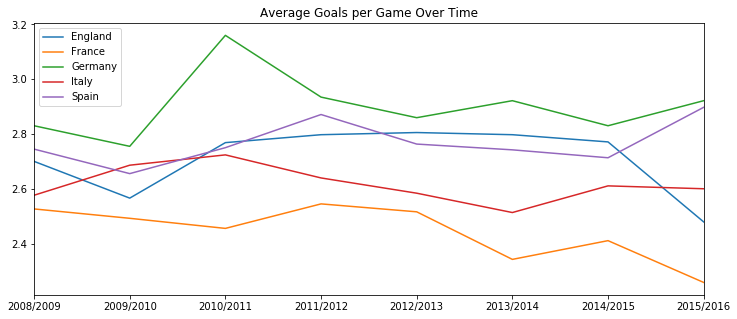

In [13]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

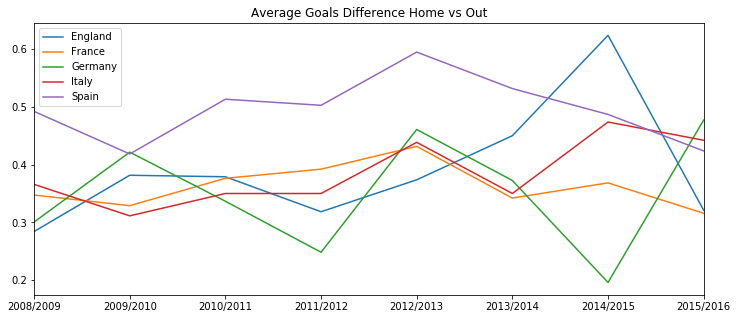

In [14]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

### Query Run Order

Now that we are familiar with most of the functionalities being used in a query, it is very important to understand the order that code runs.

First, order of how we write it (reminder):

    SELECT
    FROM
    JOIN
    WHERE
    GROUP BY
    HAVING
    ORDER BY
    LIMIT

Now, the actul order that things happens. First, you can think of this part as creating a new temporal table in the memory:

    Define which tables to use, and connect them (FROM + JOIN)
    Keep only the rows that apply to the conditions (WHERE)
    Group the data by the required level (if need) (GROUP BY)
    Choose what information you want to have in the new table. It can have just rawdata (if no grouping), or combination of dimensions (from the grouping), and metrics Now, you chose that to show from the table:
    Order the output of the new table (ORDER BY)
    Add more conditions that would filter the new created table (HAVING)
    Limit to number of rows - would cut it according the soring and the having filtering (LIMIT)



### Sub Queries and Functions

Using subqueries is an essential tool in SQL, as it allows manipulating the data in very advanced ways without the need of any external scripts, and especially important when your tables stractured in such a way that you can't be joined directly.

In our example, I'm trying to join between a table that holds player's basic details (name, height, weight), to a table that holds more attributes. The problem is that while the first table holds one row for each player, the key in the second table is player+season, so if we do a regular join, the result would be a Cartesian product, and each player's basic details would appear as many times as this player appears in the attributes table. The problem with of course is that the average would be skewed towards players that appear many times in the attribute table.

The solution, is to use a subquery. We would need to group the attributes table, to a different key - player level only (without season). Of course we would need to decide first how we would want to combine all the attributes to a single row. I used average, but one can also decide on maximum, latest season and etc. Once both tables have the same keys, we can join them together (think of the subquery as any other table, only temporal), knowing that we won't have duplicated rows after the join.

In addition, you can see here two examples of how to use functions:

    Conditional function is an important tool for data manipulation. While IF statement is very popular in other languages, SQLite is not supporting it, and it's implemented using CASE + WHEN + ELSE statement. As you can see, based on the input of the data, the query would return different results.

    ROUND - straight sorward. Every SQL languages comes with a lot of usefull functions by default.



In [15]:
players_height = pd.read_sql("""SELECT CASE WHEN ROUND(height)<165 then 165
                                            WHEN ROUND(height)>195 then 195
                                            ELSE ROUND(height)
                                            END AS calc_height, 
                               COUNT (height) AS distribution, 
                                 AVG (PA_Grouped.avg_overall_rating) AS avg_overall_rating,
                                 AVG (PA_Grouped.avg_potential) AS avg_potential,
                                 AVG (weight) AS avg_weight 
                                FROM PLAYER
                                LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                              AVG (Player_Attributes.overall_rating) AS avg_overall_rating,
                                              AVG (Player_Attributes.potential) AS avg_potential  
                                             FROM Player_Attributes
                                            GROUP BY Player_Attributes.player_api_id) AS PA_Grouped 
                                 ON PLAYER.player_api_id = PA_Grouped.player_api_id
                              GROUP BY calc_height
                              ORDER BY calc_height;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


In [16]:
players_height.plot(x=['calc_height'],y=['avg_overall_rating'],figsize=(12,5),title='Potential vs Height')

ValueError: x must be a label or position

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 What teams improved the most over the time period?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  What team attributes lead to the most victories?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Research Question 3 Which players had the most penalties?

In [ ]:
top_players = pd.read_sql("""/* Tope 20 players of 2008 having higher overall_rating*/
SELECT pa.id,
        p.player_name,
	   pa.date,
       pa.overall_rating,
       pa.potential,
       pa.preferred_foot,
       pa.attacking_work_rate,
       pa.defensive_work_rate,
       pa.crossing,
       pa.finishing,
       pa.heading_accuracy,
       pa.short_passing,
       pa.volleys,
       pa.dribbling,
       pa.curve,
       pa.free_kick_accuracy,
       pa.long_passing,
       pa.ball_control,
       pa.acceleration
  FROM Player_Attributes pa
  JOIN Player p
    ON pa.player_api_id = p.id
 WHERE pa.date BETWEEN '2008-01-01' AND '2008-12-31'
 ORDER BY overall_rating DESC
 LIMIT 20;""", conn)
top_players

In [ ]:
Teams = pd.read_sql("""SELECT *
                           FROM Team
                           WHERE team_short_name IS 'CHE';""", conn)
teams

In [ ]:
Teams = pd.read_sql("""SELECT *
                         FROM Team
                         HERE team_short_name IS 'CHE';""", conn)
teams

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!